In [2]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pathlib import Path



In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path("/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 12/Reading/fraud_transactions.csv")
)

# Review the DataFrame
df.head()


,GEO_Score,PROD_Score,y
0,19.997056,0.102230,0
1,7.076726,-3.820771,0
2,-17.707267,-3.430517,1
3,13.190588,-7.243853,0
4,3.936697,-4.589524,0


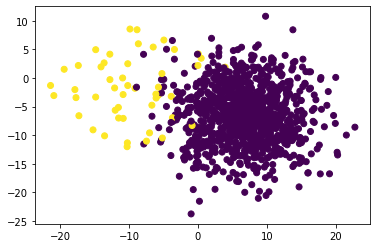

In [5]:
# Scatter plot
plt.scatter(
    # One feature on the x-axis
    x=df['GEO_Score'],
    # Another feature on the y-axis
    y=df['PROD_Score'],
    # And, the y variable displayed as the color
    c=df['y']
)



In [6]:
# Separate the data into y and X
y = df["y"]
# The "X" column should be all the features
X = df.drop(columns="y")


In [7]:
# Split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the logistic regression classifier
logistic_regression_model = LogisticRegression()

# Then fit it
logistic_regression_model.fit(X_train, y_train)


LogisticRegression()

In [8]:
#Generate training predictions
training_predictions = logistic_regression_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)


In [9]:
#Import the module
from sklearn.metrics import confusion_matrix

#Print the confusion matrix
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)



[[745   3]
 [ 13  26]]


In [10]:
# Import the module
from sklearn.metrics import classification_report
# Save a classification report
training_report = classification_report(y_train, training_predictions)
# Then view its output
print(training_report)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       748
           1       0.90      0.67      0.76        39

    accuracy                           0.98       787
   macro avg       0.94      0.83      0.88       787
weighted avg       0.98      0.98      0.98       787



In [11]:
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(y_test, testing_predictions)
# Save the classification report for the test labels
testing_report = classification_report(y_test, testing_predictions)
# View the output
print(testing_matrix)
print(testing_report)


[[252   0]
 [  4   7]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       252
           1       1.00      0.64      0.78        11

    accuracy                           0.98       263
   macro avg       0.99      0.82      0.88       263
weighted avg       0.99      0.98      0.98       263

